## WEATHER STATISTICS PROJECT
##### MEMBERS : ESPINOUX Jules, FALCOZ Nils, GRUNEWALD Augustin, PICQ Florian

#### 1 - INTRODUCTION TO DATA - NUMERICAL & GRAPHICAL SUMMARIES

In this introduction part we're going to study the dataset, the different categories, size of the set, ... 

In [2]:
data_weather <- read.table("data/donnees-synop-essentielles-omm.csv",
                        header=TRUE,
                        sep=";",
                        quote = "\"") # treat text inside "..." as a single field, even if it contains ;

In [3]:
head(data_weather)
dim(data_weather)
summary(data_weather)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


[1] 1719567      82

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.0                 
 1st Qu.:  -60.00                  1st Qu.: 2.0                 
 Median :   10.00                  Median : 3.0                 
 Mean   :   15.39                  Mean   : 4.3                 
 3rd Qu.:   90.00                  3rd Qu.: 7.0                 
 Max.   : 2990.00                  Max.   :10.0                 
 NA's   :40694                     NA's   :68236                
 Directi

- First thing to notice is the huge size of the dataset : dataframe with 82 variables and 1,719,567 data.
- We also have a numerical summary of all the numerical data (summary don't give information for string variables such as the names of the station, the region, ...)

In [4]:
# Showing the labels
names_df <- data.frame(
    index = seq_along(colnames(data_weather)),
    name = colnames(data_weather)
)
print(names_df)

   index                                                      name
1      1                                            ID.OMM.station
2      2                                                      Date
3      3                                    Pression.au.niveau.mer
4      4                         Variation.de.pression.en.3.heures
5      5                             Type.de.tendance.barométrique
6      6                             Direction.du.vent.moyen.10.mn
7      7                               Vitesse.du.vent.moyen.10.mn
8      8                                               Température
9      9                                            Point.de.rosée
10    10                                                  Humidité
11    11                                    Visibilité.horizontale
12    12                                             Temps.présent
13    13                                             Temps.passé.1
14    14                                             Temps.pas

- We have various variables giving a lot of information on the weather at a given station (First variable - see https://www.data.gouv.fr/datasets/liste-des-stations-en-open-data-du-reseau-meteorologique-infoclimat-static-et-meteo-france-synop/ to understand the ID name) and a given date (Second variable)

#### Let's extract similar group of data (temperature, pressure, wind, precipitations, snow)

In [5]:
# Selecting only values related to temperature (first in Kelvin, second in Celsius)
temperature_data <- data_weather[,c(1:2, 8, 25:29)] 
temperature_data_C <- data_weather[,c(1:2, 65:70)] 

# Sorting by ascending date
temperature_data <- temperature_data[order(temperature_data$Date), ]
temperature_data_C <- temperature_data_C[order(temperature_data_C$Date), ]

# To order again the index  
rownames(temperature_data) <- NULL
rownames(temperature_data_C) <- NULL
head(temperature_data)
head(temperature_data_C)


,ID.OMM.station,Date,Température,Température.minimale.sur.12.heures,Température.minimale.sur.24.heures,Température.maximale.sur.12.heures,Température.maximale.sur.24.heures,Température.minimale.du.sol.sur.12.heures
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81405,2015-08-04T02:00:00+02:00,299.65,305.15,NA,305.15,NA,300.55
2,7149,2015-08-04T02:00:00+02:00,297.75,NA,NA,NA,NA,NA
3,7222,2015-08-04T02:00:00+02:00,289.65,NA,NA,NA,NA,287.95
4,7299,2015-08-04T02:00:00+02:00,293.25,NA,NA,NA,NA,290.95
5,7314,2015-08-04T02:00:00+02:00,291.05,NA,NA,NA,NA,NA
6,7335,2015-08-04T02:00:00+02:00,291.75,NA,NA,NA,NA,291.45


,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81405,2015-08-04T02:00:00+02:00,26.5,32,NA,32,NA,27.4
2,7149,2015-08-04T02:00:00+02:00,24.6,NA,NA,NA,NA,NA
3,7222,2015-08-04T02:00:00+02:00,16.5,NA,NA,NA,NA,14.8
4,7299,2015-08-04T02:00:00+02:00,20.1,NA,NA,NA,NA,17.8
5,7314,2015-08-04T02:00:00+02:00,17.9,NA,NA,NA,NA,NA
6,7335,2015-08-04T02:00:00+02:00,18.6,NA,NA,NA,NA,18.3


In [6]:
# Selecting only values related to pressure
pressure_data <- data_weather[, c(1:5, 21:22)]

# Ordering by ascending date
pressure_data <- pressure_data[order(pressure_data$Date), ]

# To order again the index  
row.names(pressure_data) <- NULL
head(pressure_data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,81405,2015-08-04T02:00:00+02:00,101350,180,3,101260,NA
2,7149,2015-08-04T02:00:00+02:00,101090,-20,8,100060,NA
3,7222,2015-08-04T02:00:00+02:00,101620,130,3,101310,NA
4,7299,2015-08-04T02:00:00+02:00,101390,10,0,98250,NA
5,7314,2015-08-04T02:00:00+02:00,101670,90,0,101400,NA
6,7335,2015-08-04T02:00:00+02:00,101490,120,0,100090,NA


In [7]:
# Selecting only values related to precipitation
precipitation_data <- data_weather[, c(1:2, 10, 39:43)]

# Ordering by ascending date
precipitation_data <- precipitation_data[order(precipitation_data$Date), ]

# To order again the index  
row.names(precipitation_data) <- NULL
head(precipitation_data)

,ID.OMM.station,Date,Humidité,Précipitations.dans.la.dernière.heure,Précipitations.dans.les.3.dernières.heures,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81405,2015-08-04T02:00:00+02:00,83,0.0,0.0,0.0,-0.1,-0.1
2,7149,2015-08-04T02:00:00+02:00,53,0.0,0.0,0.0,0.0,0.0
3,7222,2015-08-04T02:00:00+02:00,84,0.0,0.0,0.0,0.0,0.0
4,7299,2015-08-04T02:00:00+02:00,74,0.0,0.0,0.0,0.0,0.0
5,7314,2015-08-04T02:00:00+02:00,96,0.0,0.2,0.2,0.2,0.4
6,7335,2015-08-04T02:00:00+02:00,90,0.4,3.0,3.0,3.0,3.0


In [8]:
# Getting all the different stations
stations <- unique(temperature_data$ID.OMM.station)
stations

[1] 81405  7149  7222  7299  7314  7335  7471 81408  7020  7240 81415  7577
[13]  7643  7110 61976 71805  7558  7621  7630  7510  7747  7434  7650  7005
[25]  7627  7607 81401  7015 61998  7761  7181 61997 78922  7130  7190  7207
[37]  7255  7535  7481  7037  7168 89642  7790  7591  7690 78897  7027  7072
[49]  7117  7139  7280 61996  7460  7661 78925 61980 67005 61972 61968 78894
[61] 78890 61970

#### Let's take a look at station 7790 for example

In [9]:
# Only looking at station 7790 for example
library(lubridate)
temperature_data_C_7790 <- temperature_data_C[temperature_data_C$ID.OMM.station == 7790,]
pressure_data_7790 <- pressure_data[pressure_data$ID.OMM.station == 7790,]
precipitation_data_7790 <- precipitation_data[precipitation_data$ID.OMM.station == 7790,]

# Conversion of the date format & checking that the steps (3, 6, 9, 12, 27 hours)
temperature_data_C_7790$DateTime <- ymd_hms(temperature_data_C_7790$Date)
pressure_data_7790$DateTime <- ymd_hms(pressure_data_7790$Date)
precipitation_data_7790$DateTime <- ymd_hms(precipitation_data_7790$Date)
diffs <- as.numeric(diff(temperature_data_C_7790$DateTime), units = "hours")
unique(diffs)
head(temperature_data_C_7790)
head(pressure_data_7790)
head(precipitation_data_7790)

[1]  3  6 12  9 27

,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,DateTime
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
43,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA,2015-08-04 00:00:00
60,7790,2015-08-04T05:00:00+02:00,21.5,NA,NA,NA,NA,NA,2015-08-04 03:00:00
154,7790,2015-08-04T08:00:00+02:00,24.3,NA,NA,NA,NA,NA,2015-08-04 06:00:00
214,7790,2015-08-04T11:00:00+02:00,32.2,NA,NA,NA,NA,NA,2015-08-04 09:00:00
234,7790,2015-08-04T14:00:00+02:00,30.8,NA,NA,NA,NA,NA,2015-08-04 12:00:00
315,7790,2015-08-04T17:00:00+02:00,30.4,NA,NA,NA,NA,NA,2015-08-04 15:00:00


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique,DateTime
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dttm>
43,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA,2015-08-04 00:00:00
60,7790,2015-08-04T05:00:00+02:00,101460,-110,7,101320,NA,2015-08-04 03:00:00
154,7790,2015-08-04T08:00:00+02:00,101520,60,3,101380,NA,2015-08-04 06:00:00
214,7790,2015-08-04T11:00:00+02:00,101480,-40,8,101340,NA,2015-08-04 09:00:00
234,7790,2015-08-04T14:00:00+02:00,101450,-30,8,101310,NA,2015-08-04 12:00:00
315,7790,2015-08-04T17:00:00+02:00,101410,-40,7,101270,NA,2015-08-04 15:00:00


,ID.OMM.station,Date,Humidité,Précipitations.dans.la.dernière.heure,Précipitations.dans.les.3.dernières.heures,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures,DateTime
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
43,7790,2015-08-04T02:00:00+02:00,68,0,0,0,0,0,2015-08-04 00:00:00
60,7790,2015-08-04T05:00:00+02:00,58,0,0,0,0,0,2015-08-04 03:00:00
154,7790,2015-08-04T08:00:00+02:00,51,0,0,0,0,0,2015-08-04 06:00:00
214,7790,2015-08-04T11:00:00+02:00,32,0,0,0,0,0,2015-08-04 09:00:00
234,7790,2015-08-04T14:00:00+02:00,47,0,0,0,0,0,2015-08-04 12:00:00
315,7790,2015-08-04T17:00:00+02:00,50,0,0,0,0,0,2015-08-04 15:00:00


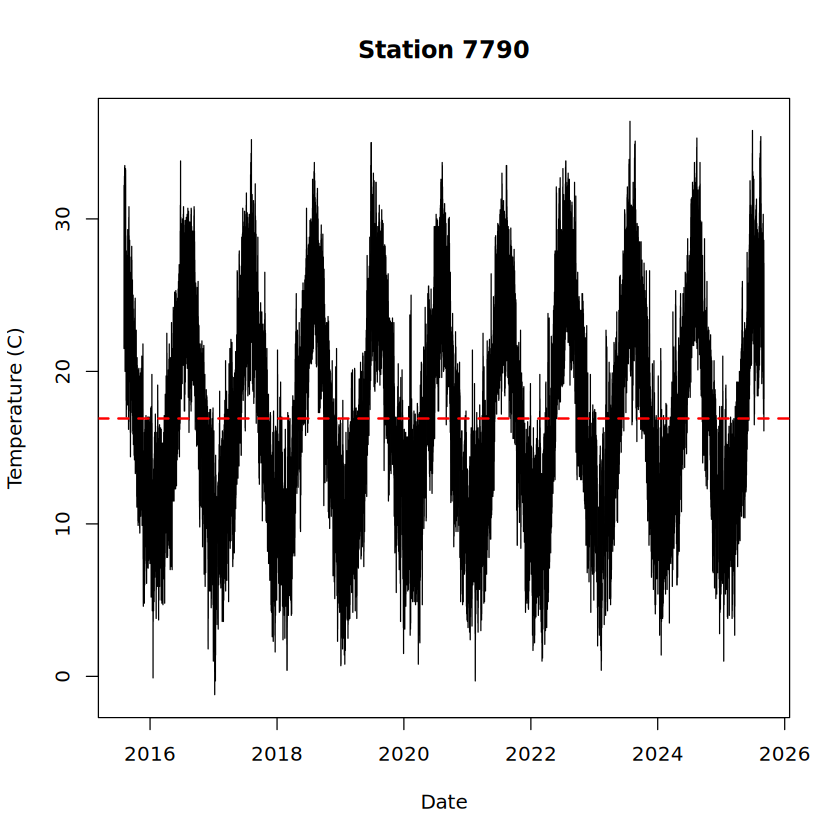

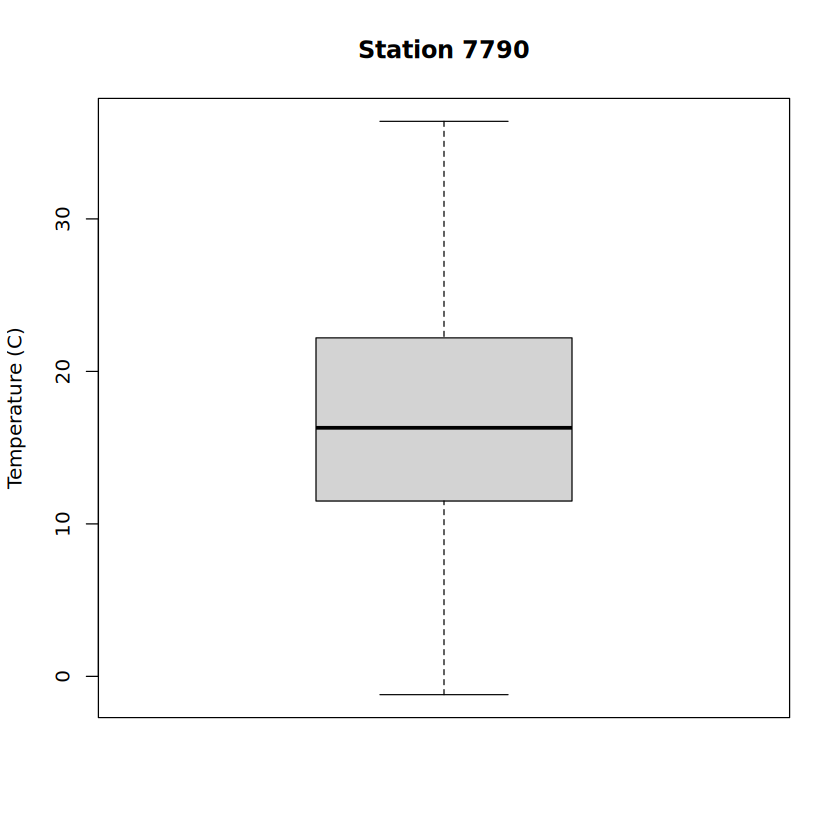

In [10]:
# Looking at the temperature
par(bg = "white")
plot(temperature_data_C_7790$DateTime, 
    temperature_data_C_7790$`Température...C.`, 
    type = "l",
    xlab = "Date", 
    ylab = "Temperature (C)", 
    main = "Station 7790")

abline(h = mean(temperature_data_C_7790$`Température...C.`, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

boxplot(temperature_data_C_7790$`Température...C.`, 
    ylab = "Temperature (C)", 
    main = "Station 7790")

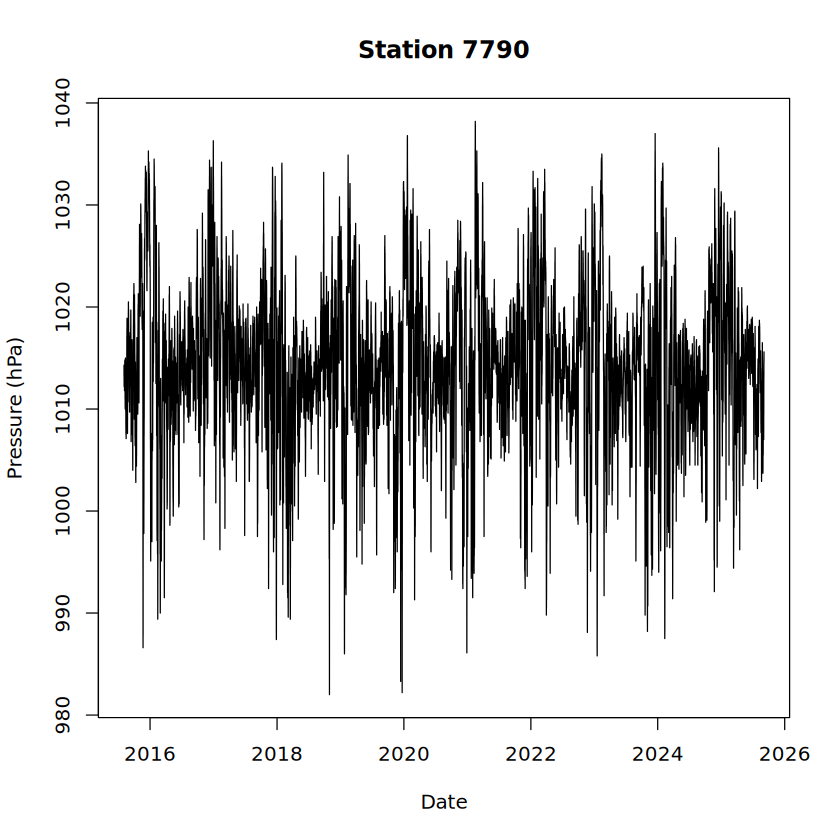

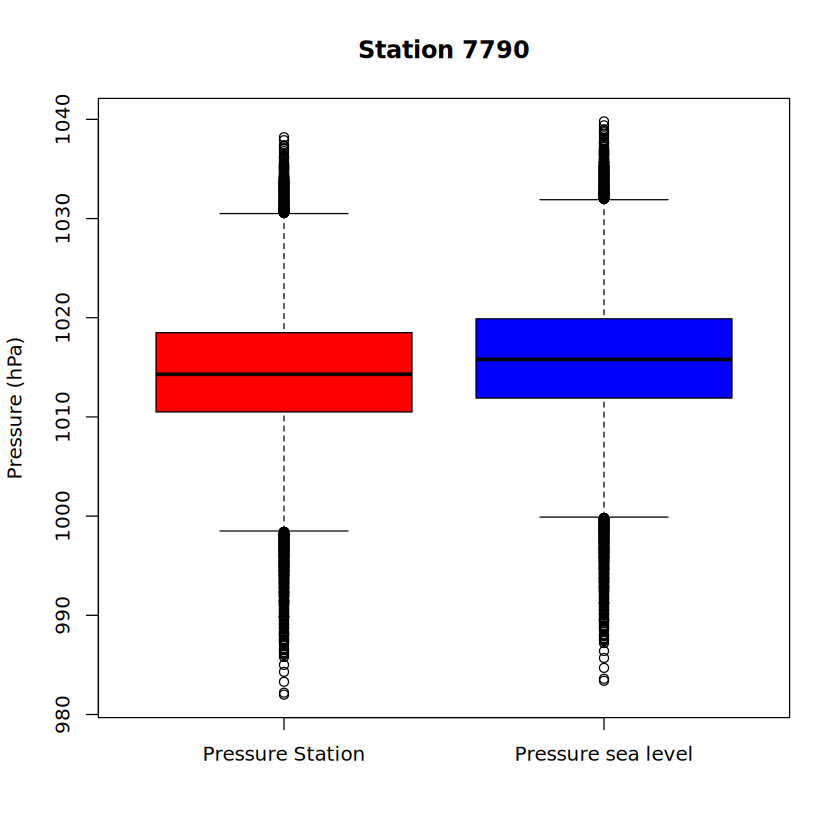

In [11]:
# Looking at the pressure
par(bg = "white")
plot(pressure_data_7790$DateTime, 
    pressure_data_7790$Pression.station/100, 
    type = "l",
    xlab = "Date", 
    ylab = "Pressure (hPa)", 
    main = "Station 7790")

boxplot(pressure_data_7790$Pression.station/100, 
    pressure_data_7790$Pression.au.niveau.mer/100,
    names = c("Pressure Station", "Pressure sea level"),
    col = c("red", "blue"),
    ylab = "Pressure (hPa)", 
    main = "Station 7790")


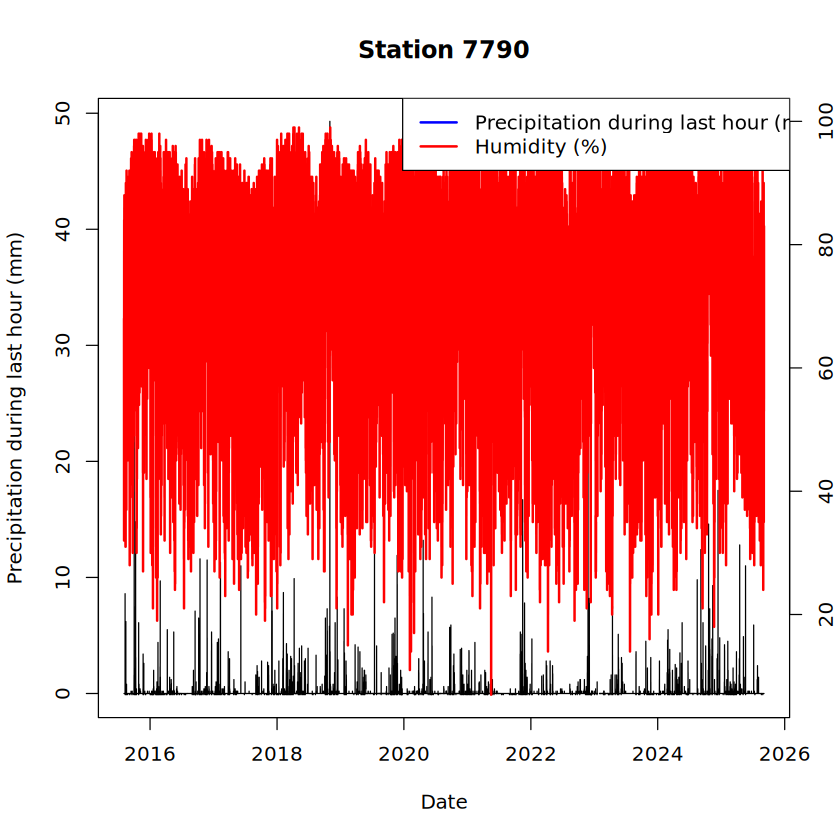

In [12]:
# Looking at the precipitation 
par(bg = "white")
plot(precipitation_data_7790$DateTime, 
    precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    type = "l",
    xlab = "Date", 
    ylab = "Precipitation during last hour (mm)", 
    main = "Station 7790")

par(new = TRUE)
plot(precipitation_data_7790$DateTime, 
      precipitation_data_7790$Humidité, 
      type = "l", col = "red", lwd = 2, axes = FALSE, xlab = "", ylab = "")
axis(side = 4)  # y axe to the right 
mtext("Humidity (%)", side = 4, line = 3)

legend("topright", legend = c("Precipitation during last hour (mm)", "Humidity (%)"),
       col = c("blue", "red"), lwd = 2)

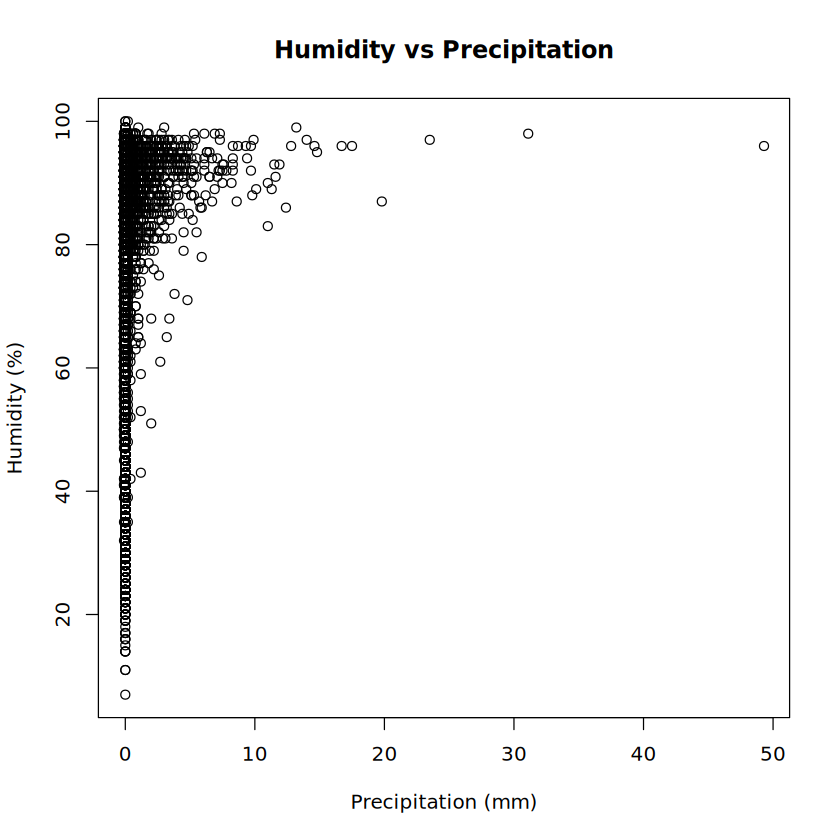

In [13]:
par(bg = "white")
plot(precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    precipitation_data_7790$Humidité,
    xlab = "Precipitation (mm)",
    ylab = "Humidity (%)",
    main = "Humidity vs Precipitation")

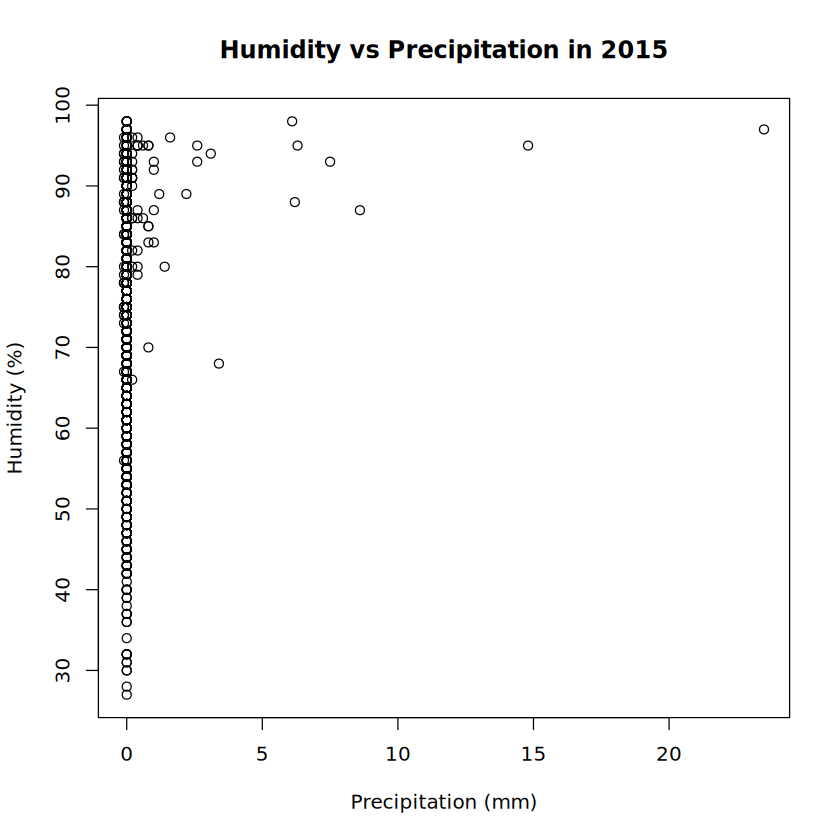

In [14]:
# Only the year 2015
precipitation_data_7790_2015 <- precipitation_data_7790[format(precipitation_data_7790$DateTime, "%Y") == 2015,] # Keeping only the date with the year 2015

par(bg = "white")
plot(precipitation_data_7790_2015$Précipitations.dans.la.dernière.heure, 
    precipitation_data_7790_2015$Humidité,
    xlab = "Precipitation (mm)",
    ylab = "Humidity (%)",
    main = "Humidity vs Precipitation in 2015")


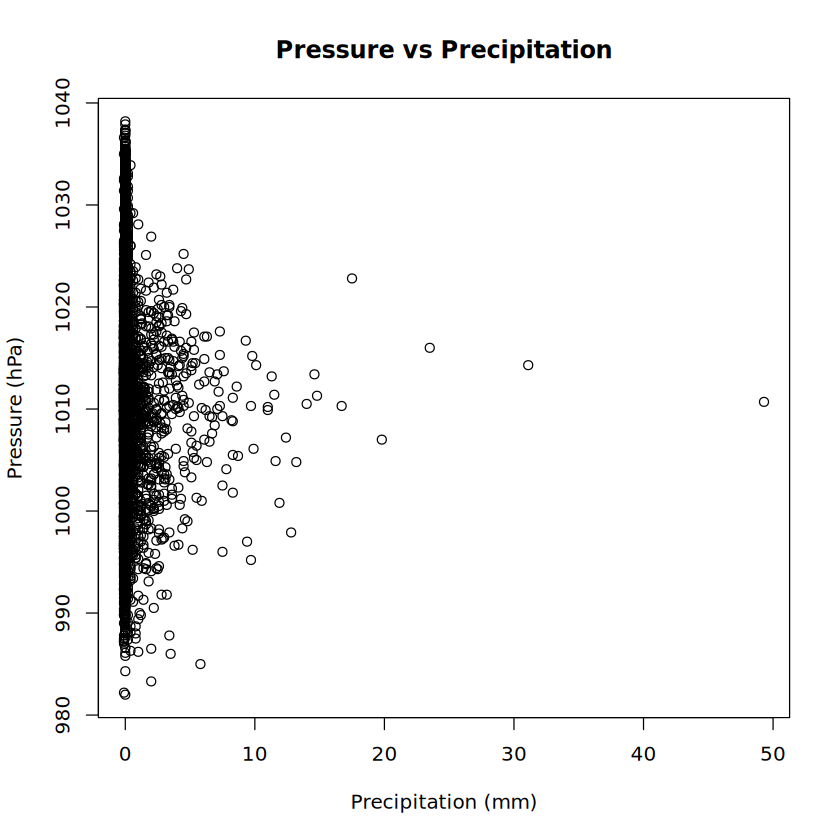

In [15]:
par(bg = "white")
plot(precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    pressure_data_7790$Pression.station/100,
    xlab = "Precipitation (mm)",
    ylab = "Pressure (hPa)",
    main = "Pressure vs Precipitation")

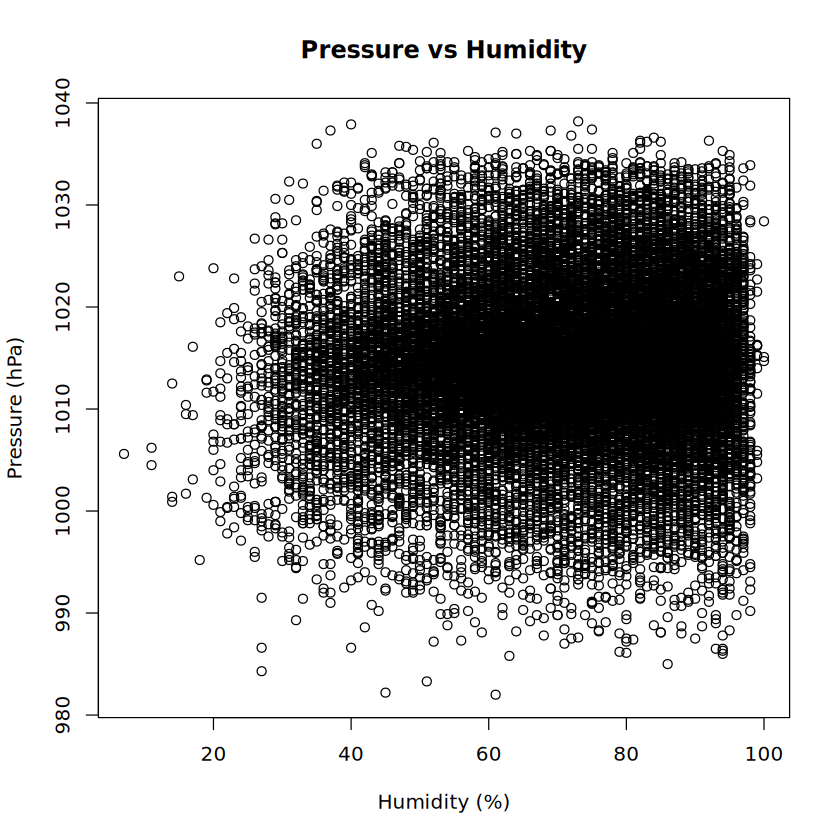

In [16]:
par(bg = "white")
plot(precipitation_data_7790$`Humidité`, 
    pressure_data_7790$Pression.station/100,
    xlab = "Humidity (%)",
    ylab = "Pressure (hPa)",
    main = "Pressure vs Humidity")

#### Looking at the average temperature on all stations

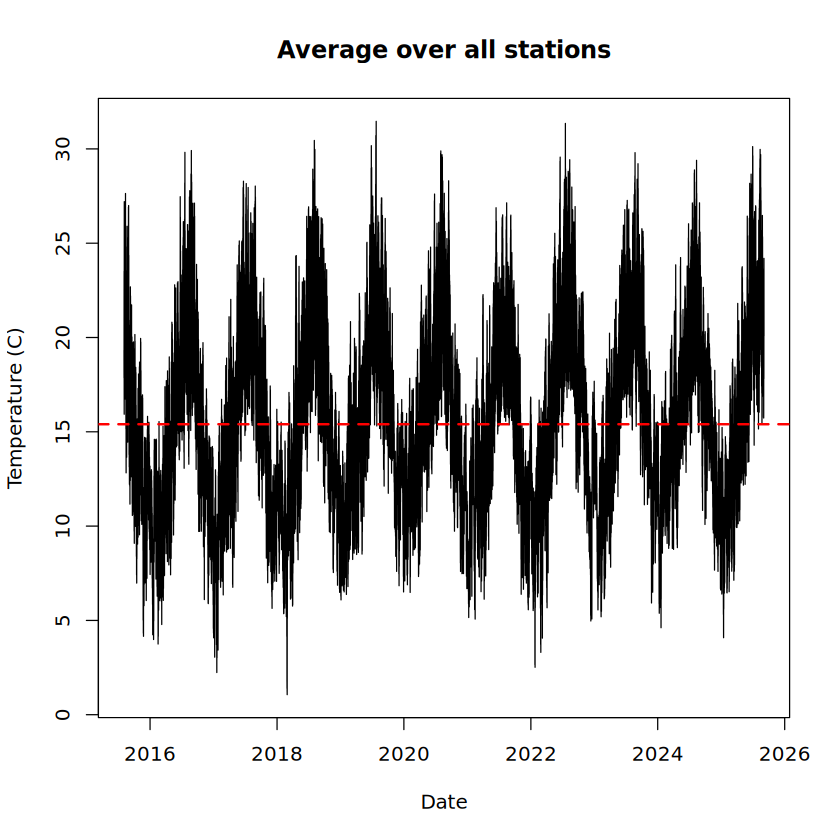

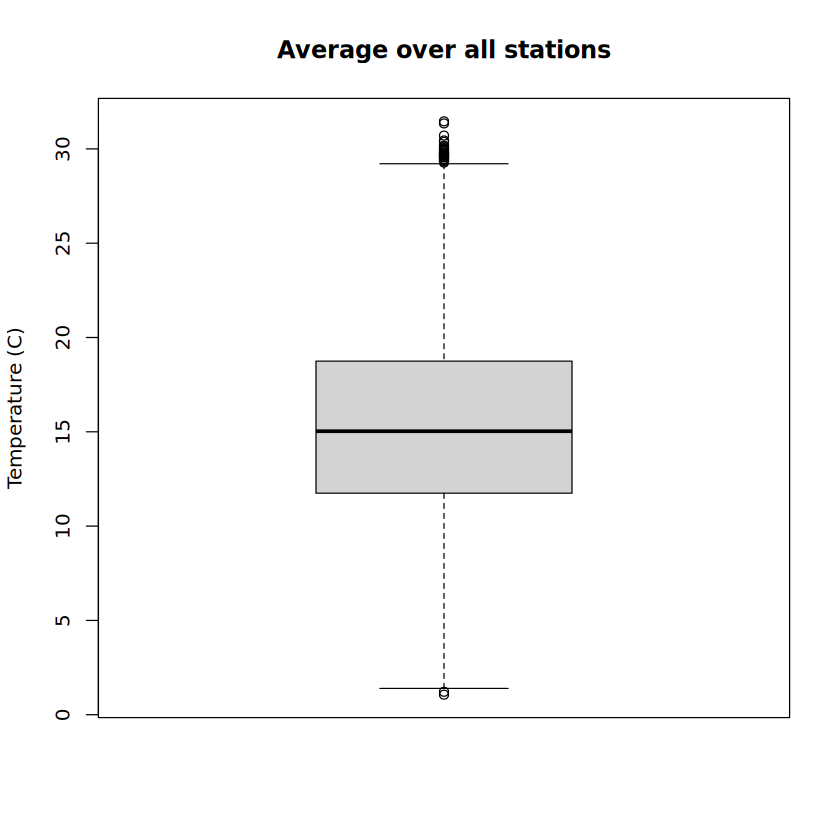

In [17]:
# Conversion of the date format & checking that the steps (3, 6, 9, 12, 27 hours)
temperature_data_C$DateTime <- ymd_hms(temperature_data_C$Date)

temperature_avg <- aggregate(`Température...C.` ~ DateTime, 
                             data = temperature_data_C, 
                             FUN = mean, 
                             na.rm = TRUE)

# Looking at the temperature
par(bg = "white")
plot(temperature_avg$DateTime, 
    temperature_avg$`Température...C.`, 
    type = "l",
    xlab = "Date", 
    ylab = "Temperature (C)", 
    main = "Average over all stations")

abline(h = mean(temperature_avg$`Température...C.`, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

boxplot(temperature_avg$`Température...C.`, 
    ylab = "Temperature (C)", 
    main = "Average over all stations")

In [18]:
# Averaging the temperature for each stations over all dates and try to cluster the stations
temperature_avg_station <- aggregate(`Température...C.` ~ ID.OMM.station, 
                             data = temperature_data_C, 
                             FUN = function(x) mean(x, na.rm = TRUE))

summary(temperature_avg_station)
#data_weather$communes..name.[data_weather$ID.OMM.station == 7005]

#station_id <- 7005  # exemple
#temps_station <- temperature_data_C$`Température...C.`[temperature_data_C$ID.OMM.station == station_id]
#summary(temps_station)

station_id <- 89642  # exemple
temps_station <- temperature_data_C$`Température...C.`[temperature_data_C$ID.OMM.station == station_id]
summary(temps_station)
#data_weather$
data_weather$Nom[data_weather$ID.OMM.station == station_id]

 ID.OMM.station  Température...C.
 Min.   : 7005   Min.   :-10.98  
 1st Qu.: 7226   1st Qu.: 12.13  
 Median : 7599   Median : 13.40  
 Mean   :28291   Mean   : 15.87  
 3rd Qu.:61979   3rd Qu.: 17.01  
 Max.   :89642   Max.   : 28.25  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -33.50  -16.50  -11.30  -10.98   -4.70    6.70       3 

[1] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
    [4] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
    [7] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [10] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [13] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [16] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [19] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [22] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [25] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [28] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [31] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [34] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [37] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [40] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [43] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [46] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [49] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [52] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [55] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [58] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [61] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [64] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [67] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [70] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [73] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [76] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [79] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [82] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [85] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [88] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [91] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [94] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [97] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [100] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [103] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [106] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [109] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [112] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [115] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [118] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [121] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [124] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [127] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [130] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [133] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [136] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [139] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [142] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [145] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [148] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [151] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [154] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [157] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [160] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [163] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [166] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [169] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [172] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [175] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [178] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [181] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [184] "DUMONT D'URVILLE" "DUMONT D'UR

# 📊 Multiple Linear Regression on Weather Data

In this section, we model the temperature as a function of season, pressure, humidity, and altitude.  
We will evaluate the model with several diagnostic plots to check how well it performs and if assumptions are respected.


In [43]:
library(dplyr)
library(lubridate)
library(ggplot2)
library(broom)


data_weather <- data_weather %>%
  mutate(
    DateTime = ymd_hms(Date),
    month = month(DateTime),
    season = case_when(
      month %in% c(12,1,2) ~ "Winter",
      month %in% c(3,4,5) ~ "Spring",
      month %in% c(6,7,8) ~ "Summer",
      TRUE ~ "Autumn"
    )
  )

data_weather$season <- factor(
  data_weather$season,
  levels = c("Winter","Spring","Summer","Autumn")
)


df_model <- data_weather %>%
  select(ID.OMM.station,
         `Température...C.`,
         season,
         Pression.au.niveau.mer,
         Humidité,
         Altitude) %>%
  na.omit()

# ========================
#  Régression linéaire multiple
# ========================
model <- lm(`Température...C.` ~ season + Pression.au.niveau.mer + Humidité + Altitude,
            data = df_model)
summary(model)

# Add predictions and residuals
df_model$pred  <- predict(model, df_model)
df_model$resid <- resid(model)
# Since the dataset is very large, we create a subsample (max 50k points) for visualization
set.seed(123)
df_small <- df_model %>% sample_n(min(50000, n()))



Call:
lm(formula = Température...C. ~ season + Pression.au.niveau.mer + 
    Humidité + Altitude, data = df_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.253  -4.626  -0.458   4.953  47.019 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4.898e+01  7.122e-01  -68.77   <2e-16 ***
seasonSpring            2.850e+00  1.820e-02  156.56   <2e-16 ***
seasonSummer            8.485e+00  1.823e-02  465.52   <2e-16 ***
seasonAutumn            4.569e+00  1.805e-02  253.12   <2e-16 ***
Pression.au.niveau.mer  7.142e-04  6.998e-06  102.05   <2e-16 ***
Humidité               -1.352e-01  3.879e-04 -348.52   <2e-16 ***
Altitude               -1.660e-02  4.660e-05 -356.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.045 on 1622646 degrees of freedom
Multiple R-squared:  0.251,	Adjusted R-squared:  0.251 
F-statistic: 9.063e+04 on 6 and 1622646 DF,  p-value: < 2.2e-1

## (a) Observed vs Predicted

This plot compares the observed temperatures (x-axis) with the predicted temperatures from the model (y-axis).  
The dashed line represents perfect predictions (Observed = Predicted).  
If points are close to this line, the model is accurate. Deviations show under- or over-predictions.


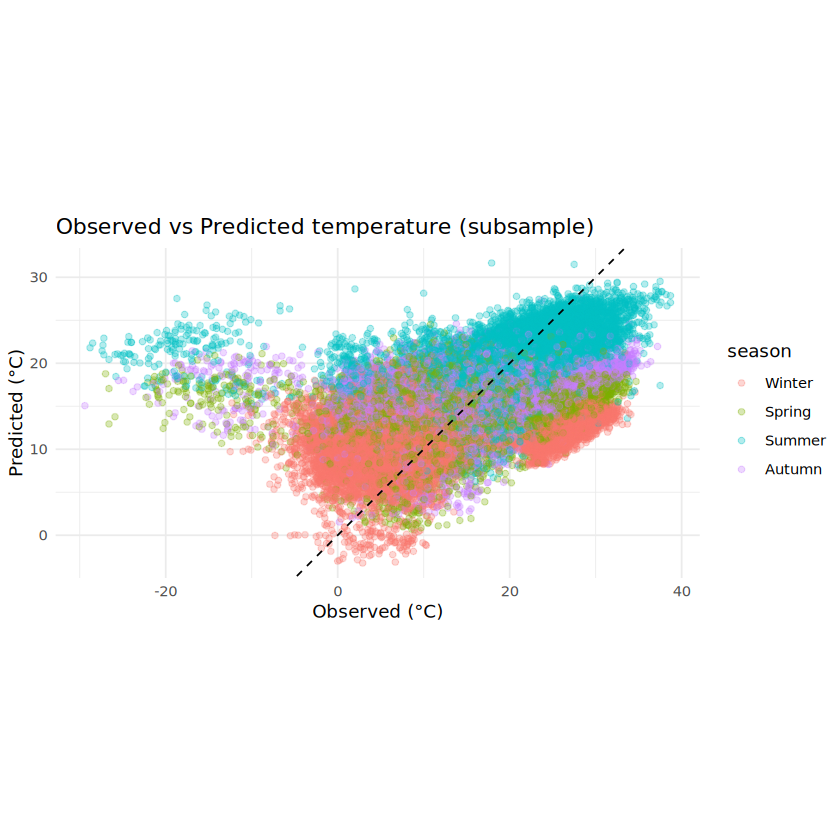

In [44]:
ggplot(df_small, aes(x = `Température...C.`, y = pred, color = season)) +
  geom_point(alpha = 0.3) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(title = "Observed vs Predicted temperature (subsample)",
       x = "Observed (°C)", y = "Predicted (°C)") +
  coord_equal() +
  theme_minimal()


## (b) Residuals vs Fitted values

This diagnostic plot checks if the residuals (errors) are randomly distributed around 0.  
A good model should have residuals centered around the dashed horizontal line, with no strong pattern.  
If we observe a structure, it means the model is missing some information.


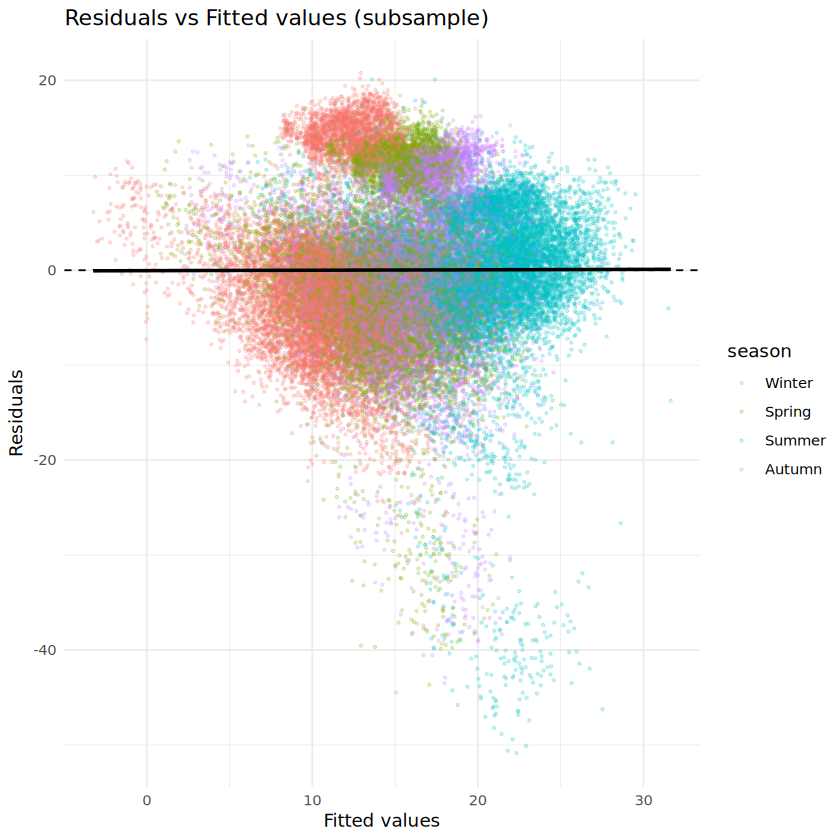

In [45]:
ggplot(df_small, aes(x = pred, y = resid, color = season)) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_point(alpha = 0.2, size = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black") +
  labs(title = "Residuals vs Fitted values (subsample)",
       x = "Fitted values", y = "Residuals") +
  theme_minimal()


## (c) Heatmap of Residuals

Since the dataset is very large, a scatterplot of all residuals would be unreadable.  
Here we use a 2D heatmap where darker areas mean higher concentration of points.  
We want the density to be centered around the red dashed line (residual = 0).


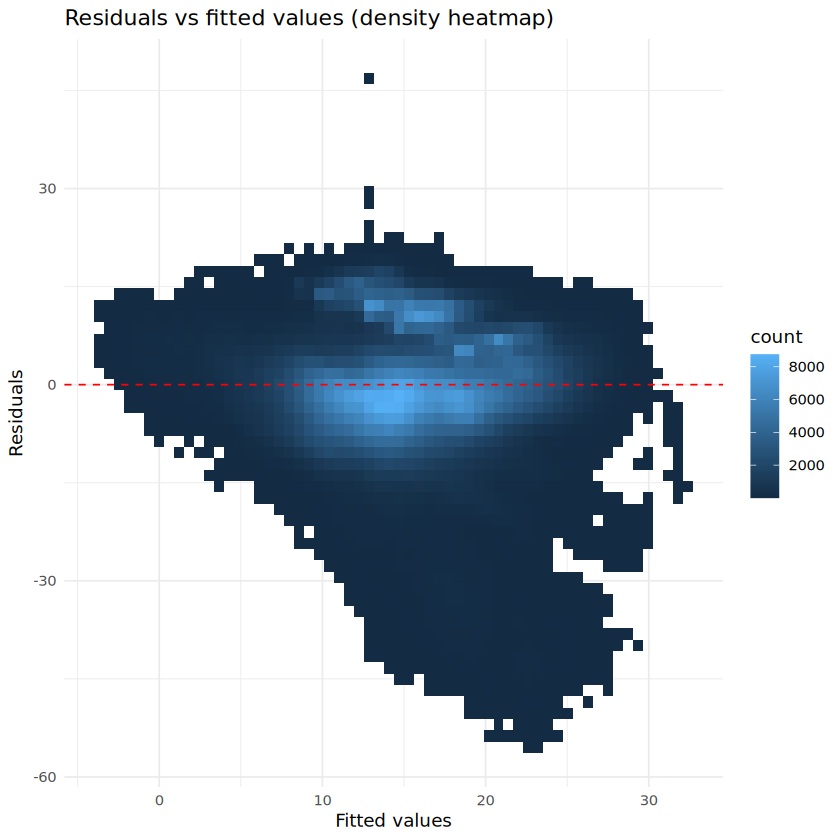

In [46]:
ggplot(df_model, aes(pred, resid)) +
  geom_bin2d(bins = 60) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs fitted values (density heatmap)",
       x = "Fitted values", y = "Residuals") +
  theme_minimal()


## (d) QQ-plot and Histogram of Residuals

These two plots check the distribution of residuals:
- The QQ-plot compares residuals to a theoretical normal distribution.  
  If points follow the red line, residuals are approximately normal.  
- The histogram shows the frequency of residuals. A bell shape indicates normality.


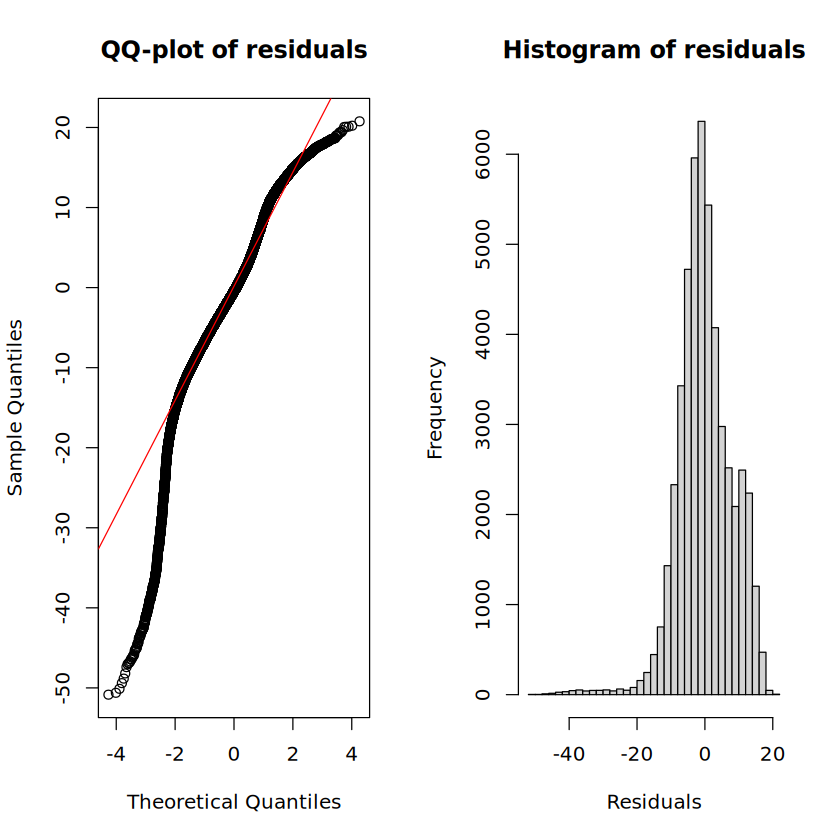

In [47]:
par(mfrow = c(1,2))
par(bg='white')
qqnorm(df_small$resid, main = "QQ-plot of residuals"); qqline(df_small$resid, col = "red")
hist(df_small$resid, breaks = 40, main = "Histogram of residuals", xlab = "Residuals")
par(mfrow = c(1,1))


## (e) Adjusted Seasonal Effect

This plot shows the predicted average temperature for each season, while keeping pressure, humidity, and altitude fixed at their mean values.  
It allows us to isolate the pure effect of the season on temperature.


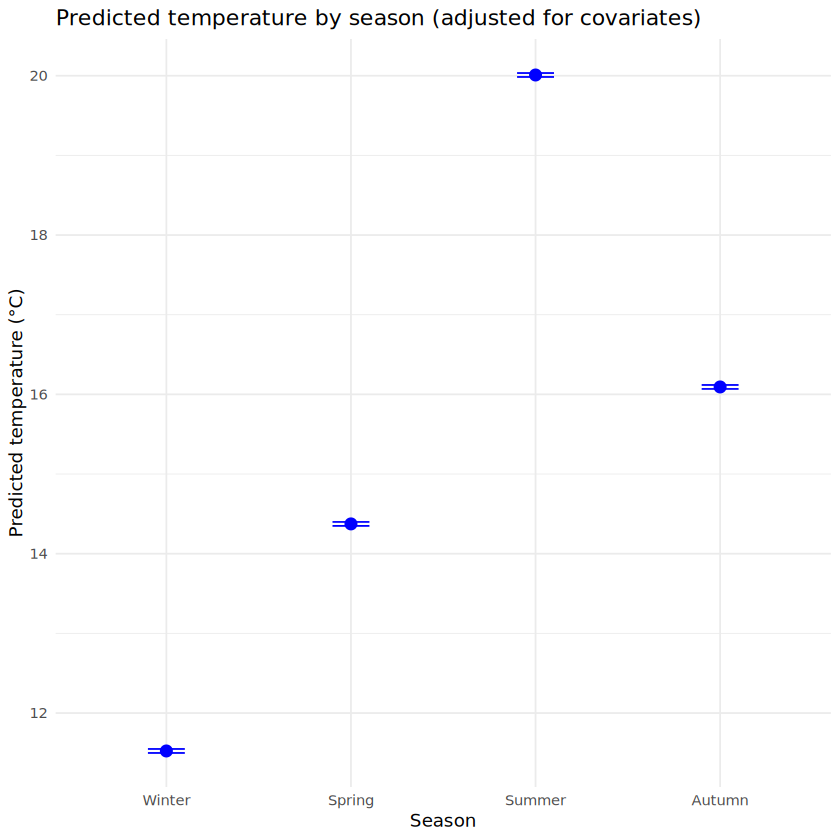

In [48]:
num_means <- sapply(df_model[, c("Pression.au.niveau.mer","Humidité","Altitude")],
                    mean, na.rm = TRUE)

newdat <- data.frame(
  season = factor(c("Winter","Spring","Summer","Autumn"),
                  levels = c("Winter","Spring","Summer","Autumn")),
  Pression.au.niveau.mer = rep(num_means[["Pression.au.niveau.mer"]], 4),
  Humidité               = rep(num_means[["Humidité"]], 4),
  Altitude               = rep(num_means[["Altitude"]], 4)
)

preds <- predict(model, newdat, se.fit = TRUE)
newdat$pred    <- preds$fit
newdat$ci_low  <- preds$fit - 1.96*preds$se.fit
newdat$ci_high <- preds$fit + 1.96*preds$se.fit

ggplot(newdat, aes(x = season, y = pred)) +
  geom_point(size = 3, color = "blue") +
  geom_errorbar(aes(ymin = ci_low, ymax = ci_high), width = 0.2, color = "blue") +
  labs(title = "Predicted temperature by season (adjusted for covariates)",
       x = "Season", y = "Predicted temperature (°C)") +
  theme_minimal()


## (f) Seasonal Boxplots by Station

This plot shows the distribution of observed temperatures for each season, separated by station.  
It highlights how temperatures vary across different regions and how the seasonal pattern repeats across stations.


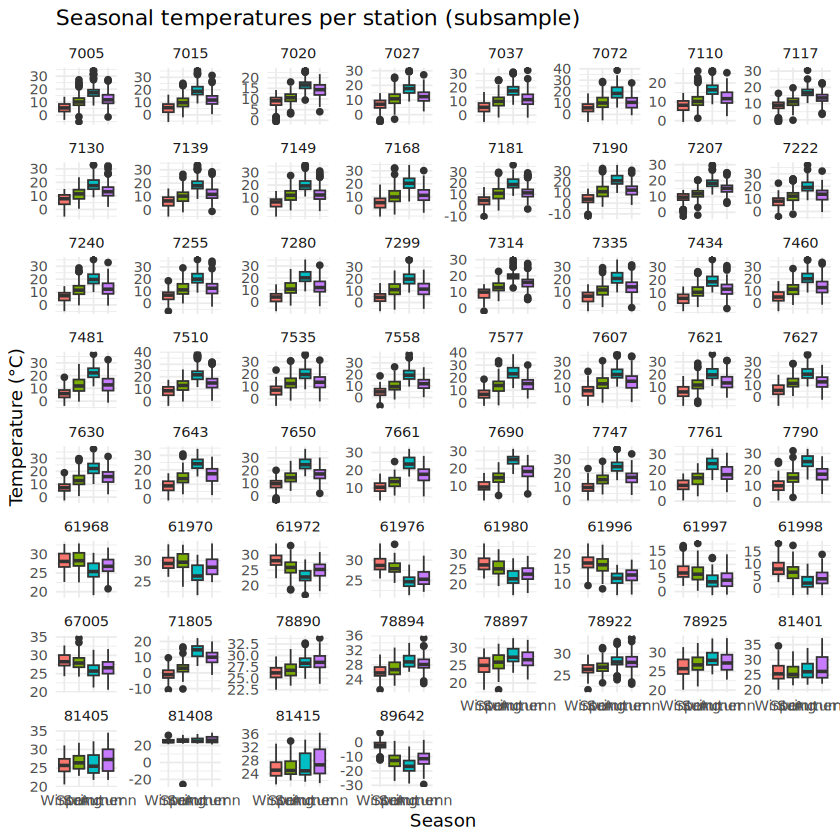

In [49]:
ggplot(df_small, aes(x = season, y = `Température...C.`, fill = season)) +
  geom_boxplot() +
  facet_wrap(~ID.OMM.station, scales = "free_y") +
  labs(title = "Seasonal temperatures per station (subsample)",
       x = "Season", y = "Temperature (°C)") +
  theme_minimal() +
  theme(legend.position = "none")


# 🌍 Unsupervised Clustering of Weather Data

In this section, we use **unsupervised learning** (k-means clustering) to automatically group weather observations (monthly averages per station).  
The goal is to check if the clusters found by the algorithm correspond to the real seasons.


In [50]:
# ========================
#   PREPARE DATA FOR CLUSTERING
# ========================
library(FactoMineR)
library(factoextra)

# Aggregate by station and month to reduce dataset size
clu_base <- data_weather %>%
  select(ID.OMM.station, DateTime, `Température...C.`, Humidité,
         Pression.au.niveau.mer, Altitude, season) %>%
  na.omit()

clu_month <- clu_base %>%
  mutate(month = lubridate::month(DateTime)) %>%
  group_by(ID.OMM.station, month, season) %>%
  summarise(
    temp_mean = mean(`Température...C.`, na.rm=TRUE),
    hum_mean  = mean(Humidité, na.rm=TRUE),
    press_mean= mean(Pression.au.niveau.mer, na.rm=TRUE),
    alt       = first(Altitude),
    n_obs     = n(),
    .groups="drop"
  ) %>%
  filter(n_obs > 10)   # keep only months with enough data


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## ✨ Principal Component Analysis (PCA)

We first use PCA to reduce dimensionality (temperature, humidity, pressure, altitude).  
This allows us to visualize the dataset in 2D while keeping most of the variance.


Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


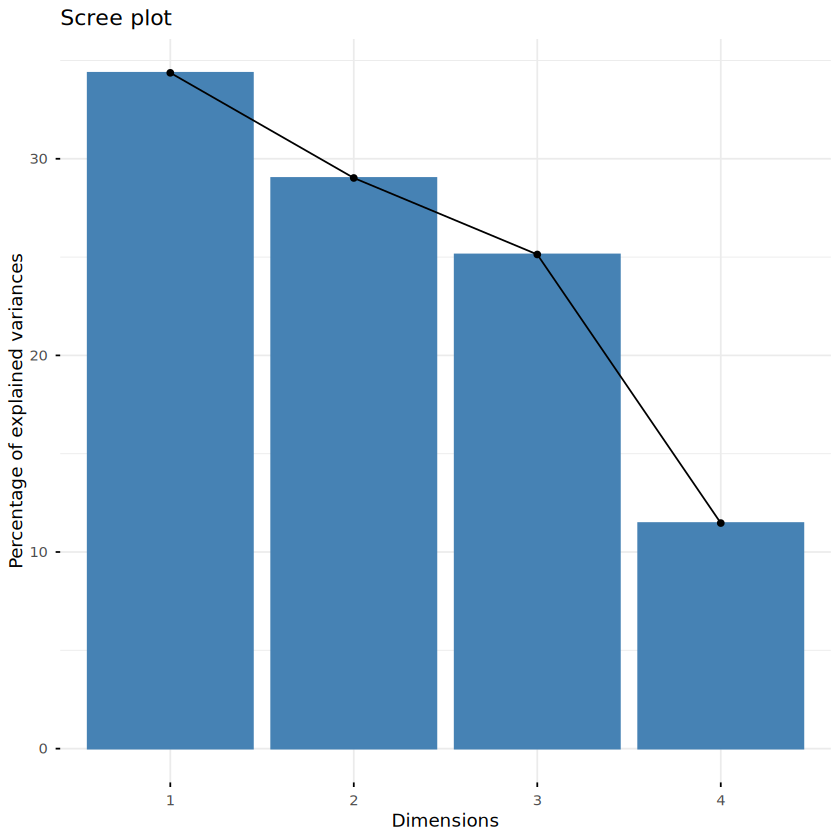

In [51]:
# Run PCA
X <- scale(clu_month[,c("temp_mean","hum_mean","press_mean","alt")])
res.pca <- PCA(X, graph = FALSE)

# Visualize variance explained
fviz_eig(res.pca)


## 🔎 K-means Clustering projected on PCA

We apply k-means clustering (k=4, since we expect 4 seasons).  
The plot below shows the clusters in the PCA space.  
Each color corresponds to a cluster found automatically.


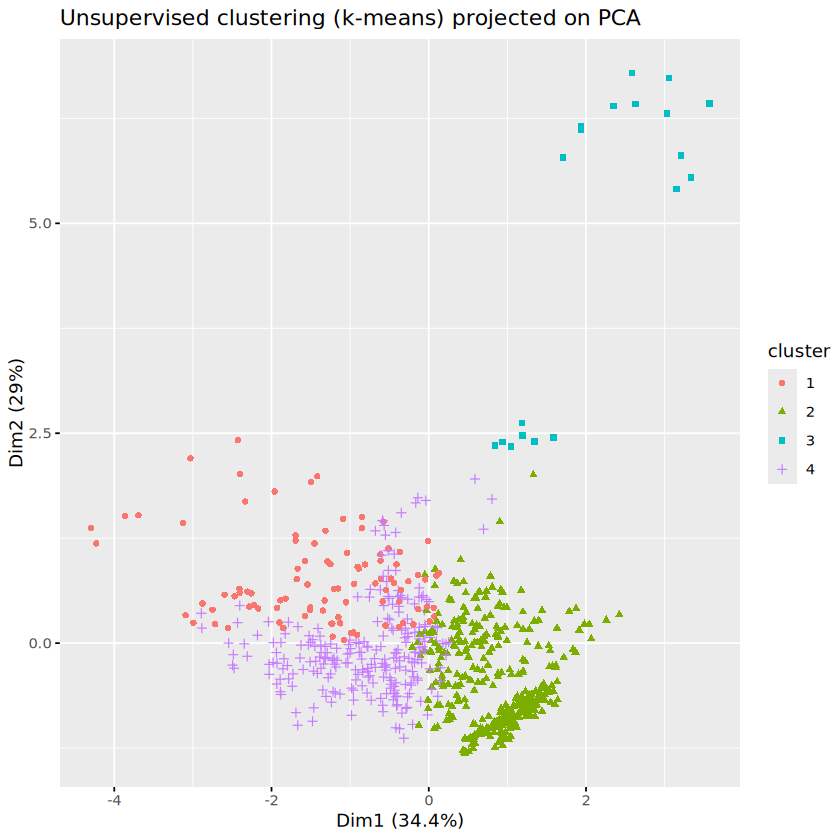

In [52]:
set.seed(123)
res.km <- kmeans(X, centers=4, nstart=25)
clu_month$cluster <- factor(res.km$cluster)

# PCA plot with clusters
fviz_cluster(list(data=X, cluster=res.km$cluster), geom="point",
             ellipse=FALSE, show.clust.cent=FALSE) +
  labs(title="Unsupervised clustering (k-means) projected on PCA")


## 📊 Cluster Composition by Season

We now compare clusters with the real seasons.  
Each bar represents one cluster, and the colors show the proportion of Winter, Spring, Summer, Autumn inside.  
If clustering works well, each cluster should correspond mainly to one season.


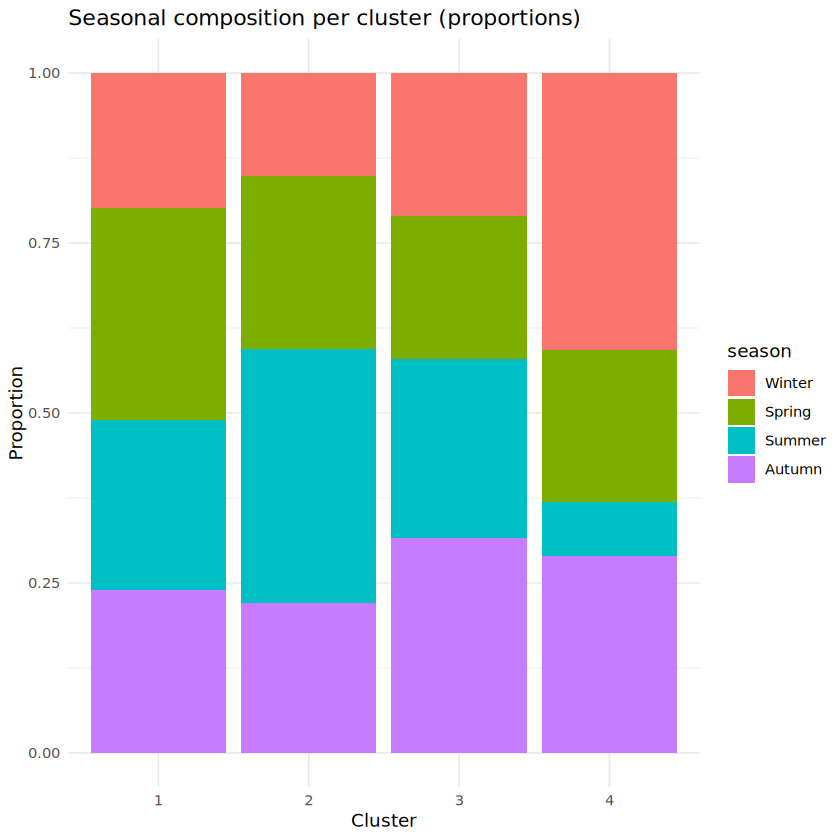

In [56]:
library(ggplot2)

ggplot(clu_month, aes(x=cluster, fill=season)) +
  geom_bar(position="fill") +
  labs(title="Seasonal composition per cluster (proportions)",
       x="Cluster", y="Proportion") +
  theme_minimal()


## 🧪 Statistical test: Does cold weather really mean it's winter?

We test whether average temperatures are significantly different between the four seasons.  
- H0: All seasons have the same mean temperature.  
- H1: At least one season has a different mean temperature.  
If the test is significant, we can conclude that cold weather is strongly associated with winter.


In [57]:
# ANOVA test
anova_model <- aov(`Température...C.` ~ season, data = df_model)
summary(anova_model)


                 Df    Sum Sq Mean Sq F value Pr(>F)    
season            3  19290379 6430126   86292 <2e-16 ***
Residuals   1622649 120912564      75                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## 🔎 Post-hoc Tukey test

The Tukey test tells us which pairs of seasons differ significantly in temperature.


In [55]:
tukey_res <- TukeyHSD(anova_model)
tukey_res


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Température...C. ~ season, data = df_model)

$season
                   diff       lwr       upr p adj
Spring-Winter  3.622455  3.573069  3.671840     0
Summer-Winter  9.613950  9.564803  9.663097     0
Autumn-Winter  4.818215  4.768697  4.867733     0
Summer-Spring  5.991495  5.942525  6.040466     0
Autumn-Spring  1.195760  1.146417  1.245103     0
Autumn-Summer -4.795735 -4.844839 -4.746631     0


## ✅ Interpretation

The ANOVA and Tukey post-hoc test confirm that temperature differences between seasons are highly significant (p < 0.001).  

- **Winter** is significantly colder than all other seasons (by 3–10°C).  
- **Summer** is significantly hotter than all other seasons (by 5–10°C).  
- **Spring** and **Autumn** are intermediate, with Autumn slightly warmer than Spring (~1°C).  

Therefore, **cold temperatures are strongly associated with Winter, while hot temperatures are strongly associated with Summer**.  
This provides clear statistical evidence that seasonal temperature patterns match our expectations.
